In [2]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age","workclass","fnlwgt","education","education-num","marital-status",
    "occupation","relationship","race","sex","capital-gain","capital-loss",
    "hours-per-week","native-country","income"
]

df = pd.read_csv(url, names=columns, na_values=" ?", sep=",\\s", engine="python")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


These is an error in transforming " ?" to missing values

In [3]:
# find rows where "?" was not transformed to NaN
df.iloc[25:31][["age", "workclass", "education", "income"]]

,age,workclass,education,income
25,56,Local-gov,Bachelors,>50K
26,19,Private,HS-grad,<=50K
27,54,?,Some-college,>50K
28,39,Private,HS-grad,<=50K
29,49,Private,HS-grad,<=50K
30,23,Local-gov,Assoc-acdm,<=50K


In [4]:
# read the data including a correction for "?"
df = pd.read_csv(url, names=columns, na_values="?", sep=",\s", engine="python")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# did the fix work?
# find rows where "?" is transformed to NaN
df.iloc[25:31][["age", "workclass", "education", "income"]]

,age,workclass,education,income
25,56,Local-gov,Bachelors,>50K
26,19,Private,HS-grad,<=50K
27,54,NaN,Some-college,>50K
28,39,Private,HS-grad,<=50K
29,49,Private,HS-grad,<=50K
30,23,Local-gov,Assoc-acdm,<=50K


In [6]:
# Get list of column names
columns_list = df.columns.tolist()
columns_list

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [7]:
# find data types of each column
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

# Step 1. Handling Missing Values
Identify which columns contain missing values.
Decide: should you drop rows/columns, or impute (fill in) the values?
If imputing, what strategy makes sense for numeric vs categorical features?

In [8]:
# Check missing nan values
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [9]:
# find the proportion of missing values in each column
df.isna().mean()

age               0.000000
workclass         0.056386
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        0.056601
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.017905
income            0.000000
dtype: float64

Since the missing values in workclass and occupation account for les than 6% we will replace them with the mode fo rthe sake of simplification.

In [10]:
# find rows in df with only missing values
df[df.isnull().all(axis=1)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [11]:
# handle missing values in categorical columns by replacing them with the mode
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    mode = df[col].mode()[0]
    df[col].fillna(mode, inplace=True)
# Verify no missing values remain
df.isna().sum()


C:\Users\adiaz\AppData\Local\Temp\ipykernel_16964\646629751.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode, inplace=True)


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

An alternative to handle categorical missing values would be to fill the missing values with a string like "N/A"

# Step 2. Handling Outliers
Explore the numeric features.
Use summary statistics and visualizations (e.g., histograms, boxplots) to detect extreme values.
Apply the IQR method or another method to set thresholds.
Decide: remove, cap, or transform outliers.

In [12]:
# Numeric columns in the dataset
num_cols = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

# 1. Summary statistics
df[num_cols].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


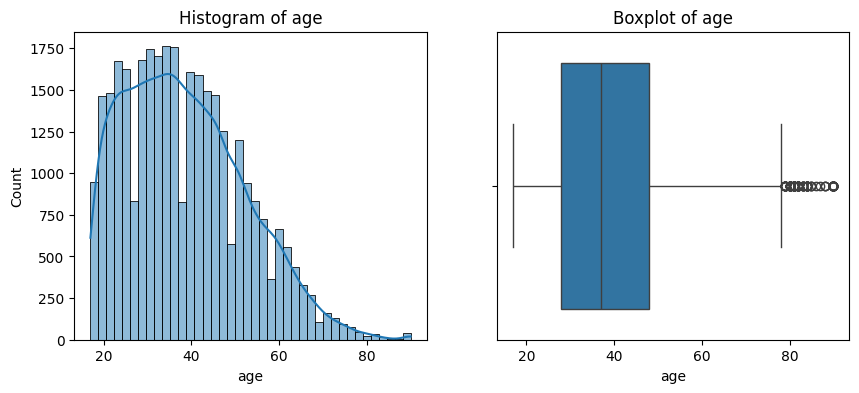

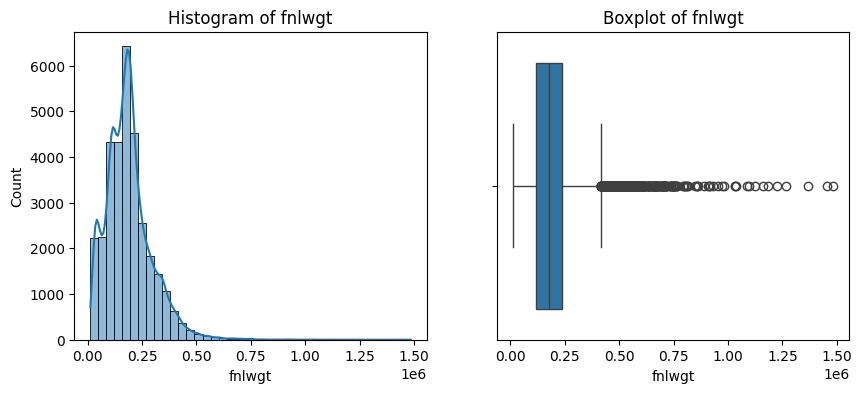

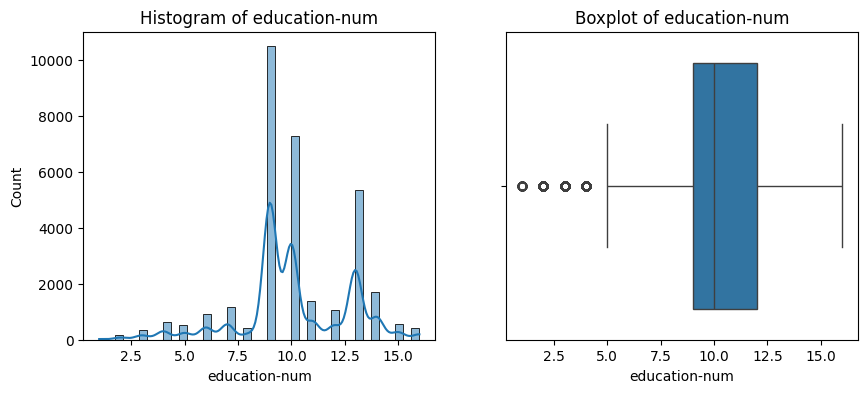

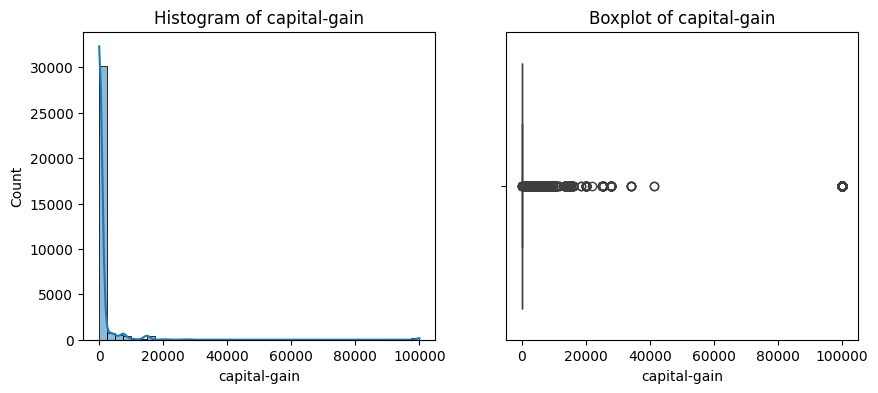

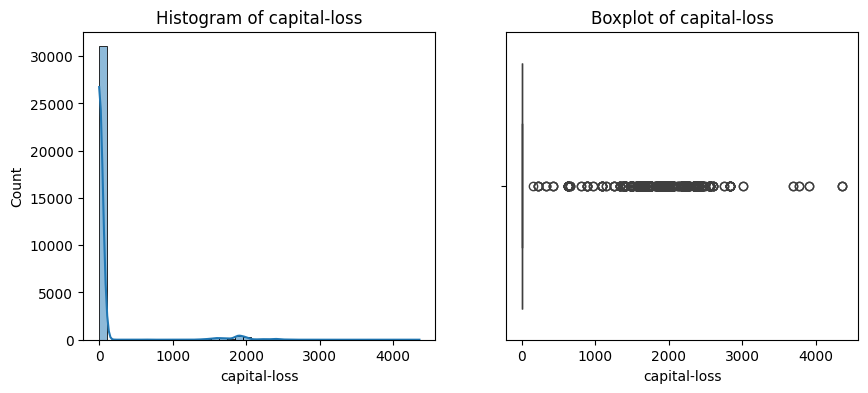

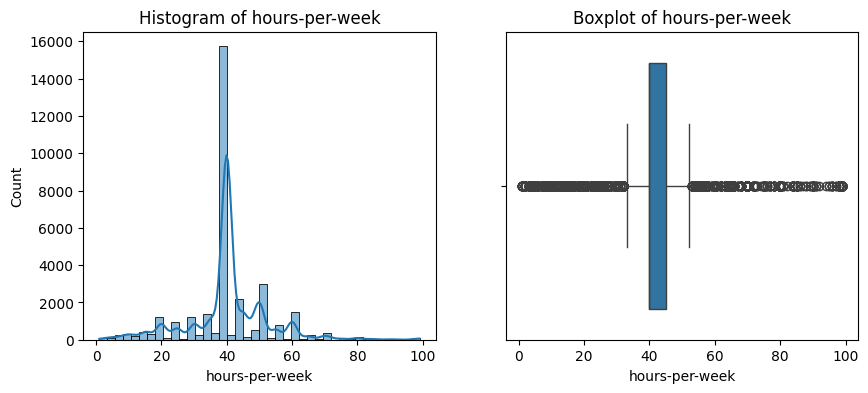

In [13]:
# 2. Visualize distributions

import matplotlib.pyplot as plt
import seaborn as sns
for col in num_cols:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=40)
    plt.title(f"Histogram of {col}")
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    
    plt.show()

In [14]:
# Compute skewness
skew_values = df[num_cols].skew()
skew_values

age                0.558743
fnlwgt             1.446980
education-num     -0.311676
capital-gain      11.953848
capital-loss       4.594629
hours-per-week     0.227643
dtype: float64

In [ ]:
# Set a threshold for high skew (e.g., |skew| > 1)
highly_skewed = skew_values[abs(skew_values) > 1]

print("Highly skewed numeric columns:")
print(highly_skewed)

Highly skewed numeric columns:
fnlwgt           1.446980
capital-gain    11.953848
capital-loss     4.594629
dtype: float64


Highly skewed columns (capital-gain and capital-loss)

In [18]:
# for col in num_cols:
#     sns.histplot(df[col], kde=True)
#     plt.title(f"{col} - Skewness: {df[col].skew():.2f}")
#     plt.show()

In [16]:
# Pairplot for all numeric columns and see how income affects the distributions
#sns.pairplot(df, hue="income", vars=num_cols)
#sns.pairplot(df[num_cols + ["income"]], hue="income", palette="Set1")
#plt.show()

In [17]:
# 3. Detect outliers with IQR
outliers = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f"{col}: lower={lower_bound}, upper={upper_bound}, outliers={outliers[col]}")

age: lower=-2.0, upper=78.0, outliers=143
fnlwgt: lower=-61009.0, upper=415887.0, outliers=992
education-num: lower=4.5, upper=16.5, outliers=1198
capital-gain: lower=0.0, upper=0.0, outliers=2712
capital-loss: lower=0.0, upper=0.0, outliers=1519
hours-per-week: lower=32.5, upper=52.5, outliers=9008
